In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
HE_df=pd.read_csv('../Data/HospitalityEmployees.csv')
HE_df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [3]:
HE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
Date         348 non-null object
Employees    348 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


In [4]:
HE_df.columns=['ds', 'y']
HE_df['ds'] = pd.to_datetime(HE_df['ds'])

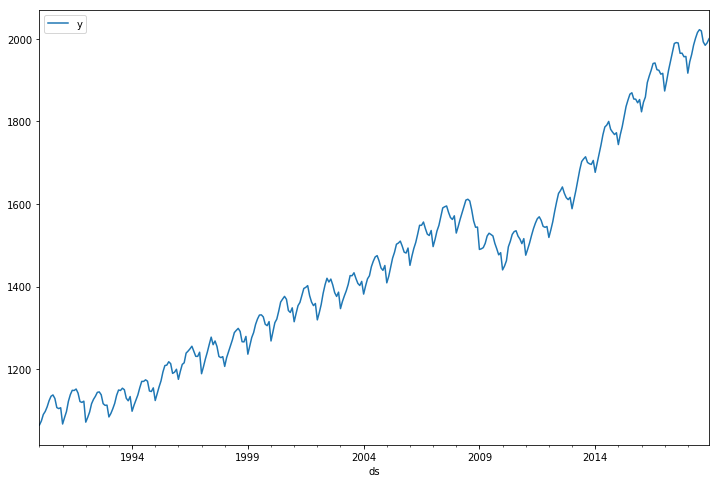

In [5]:
HE_df.plot(x='ds', y='y', figsize=(12,8));

In [6]:
m = Prophet()
m.fit(HE_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

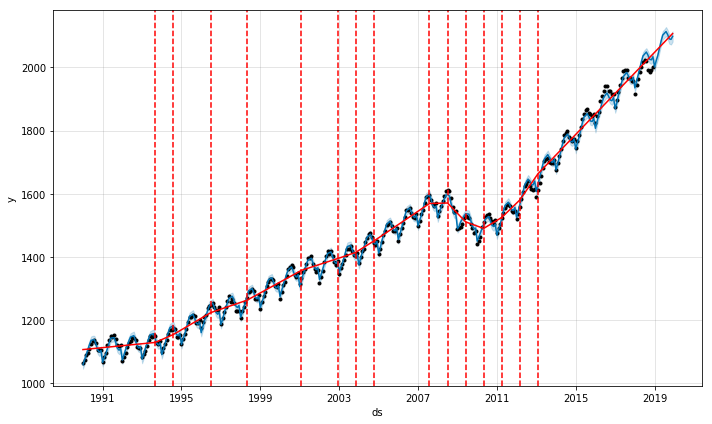

In [8]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)